
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">📊 Segmentación de Factores de riesgo vial</h1>
<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;"></h3>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center;">El objetivo del proyecto es aplicar modelos de aprendizaje no supervisado, para segmentar y analizar grupos de choferes de motovehiculos basandose en factores de riesgo viales.</p>
    
<p style="font-size: 14px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Autor: Patricio Garcia</p>



    
</div>


<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
        <h2 style="font-family: 'Verdana'; color: #3A405A;">🔍 Información sobre los datos</h2>
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">El dataset fue tomado de los datos publicados por la ciudad de Buenos Aires. El mismo contiene información sobre motovehiculos y factores de riesgo registrados en el año 2022.
    
  <p style="font-size: 10px; font-family: 'Verdana'; color: #3A405A;"></p>
</div>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Descripción del datasaet</h3>

- **Fuente**: https://data.buenosaires.gob.ar/dataset/estudio-observacional-factores-riesgo-vial/resource/0d9c3972-659b-413d-9f24-c63715973d59 <br>
    
    
- **Diccionario de observaciones**: https://data.buenosaires.gob.ar/dataset/estudio-observacional-factores-riesgo-vial/resource/136fb594-4665-4fc6-88b1-efda150a450c
    
    
- **Variables**:
    
  -Norden: Código identificador de la observación
    
  -Fecha_Inicial: Fecha (AAAA-MM-DD) de inicio de la observación
    
  -Hora_Inicio: Hora (HH:MM:SS) de inicio de la observación
    
  -Fecha_Fin: Fecha (AAAA-MM-DD) del fin de la observación
    
  -Hora_Fin: Hora (HH:MM:SS) del fin de la observación
    
  -Dia_Habil: Indica si el día del operativo en el cual se hizo la observación es hábil o fin de semana 	
    
  -Turno: Indica el momento del día en que se realizó la observación
    
  -Punto_observacion: Contiene la intersección de calles y/o avenidas donde se hizo la observación.

  -Zona: Indica la zona a la cual pertenece el punto de observación dentro de la CABA
    
  -Uso: Indica si la moto o ciclomotor es de uso particular o comercial
    
  -Sexo: Indica el género del conductor de la moto o ciclomotor a partir de la observación visual
    
  -Casco_Conductor: Indica si el conductor lleva puesto correctamente el casco
    
  -Tipo_Distraccion: Señala si el conductor de la moto o ciclomotor tiene algún tipo de distracción mientras espera en el semáforo
    
  -Pasajero: En el caso de haber un acompañante se indica el grupo etario al cual pertenece
    
  -Sexo_Pasajero: Indica el género del pasajero a partir de la observación visual	
    
  -Casco_Pasajero: Indica si el acompañante lleva puesto correctamente el casco
    
  -Tiene_Patente: Señala si el vehículo poseía patente en su lugar y condiciones determinadas por Ley
    
  -Patente_Mercosur: Indica si la moto o ciclomotor posee patente única del Mercosur
    
  -Antiguedad: Estima la antigüedad del vehículo a partir del tipo de patente observada
    
  -Cantidad_Ocupantes: Indica la cantidad de ocupantes encima de la moto o ciclomotor	
    
  -Uso_Casco: Señala si todos los ocupantes del vehículo tienen y utilizan correctamente el casco

    
    

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">📊 Importación de librerias y lectura de datos</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Se importan las librerias a utilizar durante el proyecto, se leen y guardan los datos.</p>
</div>

Se importan librerias que se usan en el proyecto.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import AA_utils
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

Se abre el dataset y guardan datos.

In [125]:
# url = r'C:\Users\usuario\Desktop\Data Science\Proyectos\Segmentacion accidentes motos\base_obs_motos_2022.xlsx'
# raw_data = pd.read_excel(url)
raw_data = pd.read_excel(r'base_obs_motos_2022.xlsx')


Se imprimen las primeras observaciones del dataset.

In [126]:
raw_data.head()

,Norden,Fecha_Inicial,Hora_Inicio,Fecha_Fin,Hora_Fin,Dia_Habil,Turno,Punto_observacion,Zona,Uso,...,Casco_Conductor,Tipo_Distraccion,Pasajero,Sexo_Pasajero,Casco_Pasajero,Tiene_Patente,Patente_Mercosur,Antiguedad,Cantidad_Ocupantes,Uso_Casco
0,1,2022-10-25,15:50:12,2022-10-25,15:53:06,1,2,AV. CORRIENTES Y AV. DORREGO,3,1,...,1,1,NaN,NaN,NaN,1,2,2,1,1
1,2,2022-10-25,15:53:16,2022-10-25,15:59:06,1,2,AV. MONTES DE OCA Y ARISTOBULO DEL VALLE,4,1,...,1,4,NaN,NaN,NaN,1,1,1,1,1
2,3,2022-10-25,08:19:26,2022-10-25,09:07:37,1,1,AV. NAZCA Y AV. JUAN B. JUSTO,3,1,...,1,4,NaN,NaN,NaN,1,1,1,1,1
3,4,2022-10-25,08:56:21,2022-10-25,08:56:37,1,1,AV. EMILIO CASTRO Y CORVALAN,1,1,...,1,4,NaN,NaN,NaN,1,1,1,1,1
4,5,2022-10-25,08:56:44,2022-10-25,09:00:53,1,1,AV. DEL LIBERTADOR Y ARIAS,1,1,...,1,4,NaN,NaN,NaN,1,2,2,1,1


In [152]:
df.describe()

,Dia_Habil,Turno,Zona,Uso,Sexo,Casco_Conductor,Tipo_Distraccion,Tiene_Patente,Cantidad_Ocupantes,Uso_Casco
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,1.342568,1.540018,2.433157,1.271768,1.090589,1.110378,3.485488,1.092348,1.117854,1.117854
std,0.474673,0.498506,1.029341,0.444969,0.287087,0.313429,1.117399,0.289581,0.322506,0.322506
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000


In [127]:
raw_data.shape

(2477, 21)

El dataset contiene 2477 observaciones y 21 variables.

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Limpieza y preprocesamiento de datos</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Se realizan los siguientes pasos: <br>
    - Eliminación de columnas que no aportan información relevante. <br>
    - Busqueda de n/a <br> 
    </p>
</div>

En primer lugar se eliminan las variables que no serán usadas para el análisis ni el modelado.

In [128]:
todrop = ['Norden', 
          'Fecha_Inicial',
          'Hora_Inicio', 
          'Fecha_Fin',
          'Hora_Fin',
          'Pasajero',
          'Sexo_Pasajero',
          'Casco_Pasajero',
          'Patente_Mercosur',
          'Punto_observacion',
          'Antiguedad'
    ]
    


df = raw_data.drop(columns = todrop)

Se buscan posibles valores nulos.

In [129]:
df.isnull().sum()

Dia_Habil             0
Turno                 0
Zona                  0
Uso                   0
Sexo                  0
Casco_Conductor       0
Tipo_Distraccion      0
Tiene_Patente         0
Cantidad_Ocupantes    0
Uso_Casco             0
dtype: int64

No se encuentran valores nulos en el dataset.

In [130]:
df.head()

,Dia_Habil,Turno,Zona,Uso,Sexo,Casco_Conductor,Tipo_Distraccion,Tiene_Patente,Cantidad_Ocupantes,Uso_Casco
0,1,2,3,1,1,1,1,1,1,1
1,1,2,4,1,1,1,4,1,1,1
2,1,1,3,1,1,1,4,1,1,1
3,1,1,1,1,1,1,4,1,1,1
4,1,1,1,1,1,1,4,1,1,1


<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Análisis exploratorio de datos</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">En este apartado, se busca estudiar la relación entre variables haciendo uso de gráficos. A su vez, se realizan modificaciones pertinentes en el dataset cuando se las considera necesarias.<br> Los nombres de cada categoria se obtuvieron del diccionario de observaciones, citado en la sección "Descripción del dataset".
    
</p>
</div>

In [131]:
df.head()

,Dia_Habil,Turno,Zona,Uso,Sexo,Casco_Conductor,Tipo_Distraccion,Tiene_Patente,Cantidad_Ocupantes,Uso_Casco
0,1,2,3,1,1,1,1,1,1,1
1,1,2,4,1,1,1,4,1,1,1
2,1,1,3,1,1,1,4,1,1,1
3,1,1,1,1,1,1,4,1,1,1
4,1,1,1,1,1,1,4,1,1,1


### Tipo de día

Text(0.5, 1.0, 'Observaciones por tipo de día')

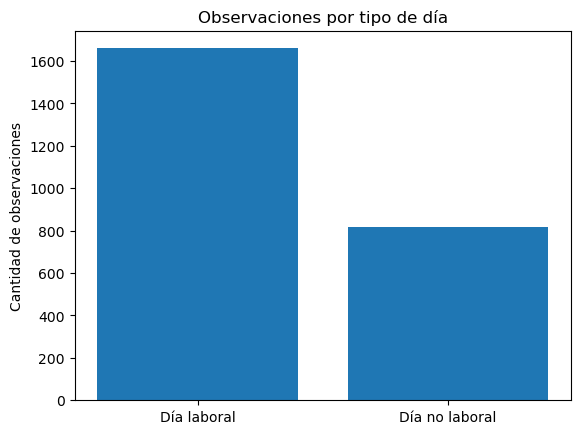

In [132]:
plt.bar( ['Día laboral', 'Día no laboral'] , df['Dia_Habil'].value_counts().values) 
plt.ylabel('Cantidad de observaciones')
plt.title('Observaciones por tipo de día')

La mayor cantidad de observaciones se da en días laborales.

### Turno

Text(0.5, 1.0, 'Observaciones por turno')

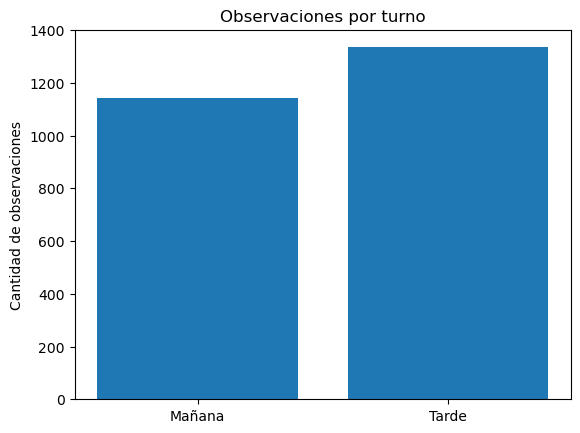

In [133]:
categorias = ['Mañana', 'Tarde']
valores = df['Turno'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)
plt.title('Observaciones por turno')

Hay una mayor cantidad de observaciones en el turno tarde.

### Zona

Text(0.5, 1.0, 'Observaciones por zona')

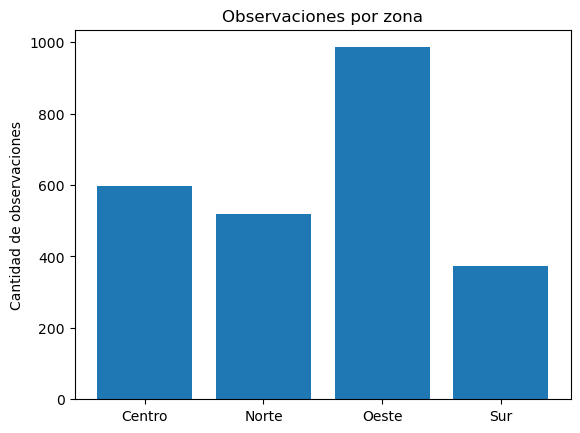

In [134]:
categorias = ['Centro', 'Norte', 'Oeste', 'Sur']
valores = df['Zona'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)
plt.title('Observaciones por zona')

Se advierte una mayor cantidad de observaciones en la zona 3.

In [135]:
raw_data[['Punto_observacion', 'Zona']].groupby(['Zona', 'Punto_observacion']).sum()

Empty DataFrame
Columns: []
Index: [(1, AV. ALEM Y LAVALLE), (1, AV. CALLAO Y AV. CORRIENTES), (1, AV. CALLAO Y PARAGUAY), (1, AV. CORRIENTES Y 25 DE MAYO), (1, AV. CORRIENTES Y AV. CALLAO), (1, AV. DEL LIBERTADOR Y AGOTE), (1, AV. DEL LIBERTADOR Y ARIAS), (1, AV. DEL LIBERTADOR Y AV. PUEYRREDON), (1, AV. DEL LIBERTADOR Y LUIS AGOTE), (1, AV. EMILIO CASTRO Y CORVALAN), (1, AV. FIGUEROA ALCORTA Y BIBILONI), (1, AV. INDEPENDENCIA Y BERNARDO DE IRIGOYEN), (1, AV. PUEYRREDON Y AZCUENAGA), (1, AV. PUEYRREDON Y LEVENE), (1, BARTOLOME MITRE Y CARLOS PELLEGRINI), (1, BARTOLOME MITRE Y CERRITO), (1, HIPOLITO YRIGOYEN Y SAN JOSE), (1, PARAGUAY Y RODRIGUEZ PEÑA), (2, AV. ALVAREZ THOMAS Y TRONADOR), (2, AV. BULLRICH Y AV. SANTA FE), (2, AV. CABILDO Y ARIAS), (2, AV. DE LOS CONSTITUYENTES Y ALVAREZ PRADO), (2, AV. DE LOS CONSTITUYENTES Y PIRAN), (2, AV. JUAN B. JUSTO Y CHARCAS), (2, AV. LAS HERAS Y SALGUERO), (2, AV. MOSCONI Y CARACAS), (2, AV. RICARDO BALBIN Y AV. MELIAN), (2, AV. TRIUNVIRATO Y AV. CRISOLOGO LARRALDE), (2, MENDOZA Y AMENABAR), (2, MONROE Y CERETTI), (3, AV. CORRIENTES Y ARAOZ), (3, AV. CORRIENTES Y AV. DORREGO), (3, AV. CORRIENTES Y AV. SCALABRINI ORTIZ), (3, AV. DIRECTORIO Y DEL BARCO CENTENERA), (3, AV. FRANCISCO BEIRO Y CERVANTES), (3, AV. JUAN B. JUSTO Y AV. CARRASCO), (3, AV. LOPE DE VEGA Y AV. JUAN B. JUSTO), (3, AV. NAZCA Y AV. JUAN B. JUSTO), (3, AV. RIVADAVIA Y COLOMBRES), (3, AV. RIVADAVIA Y DEL BARCO CENTENERA), (3, AV. SAN MARTIN Y APOLINARIO FIGUEROA), (3, AV. SAN MARTIN Y NAVARRO), (3, ROSARIO Y DEL BARCO CENTENERA), (4, AV. BRUIX Y BRAGADO), (4, AV. CHICLANA Y AV. CASEROS), (4, AV. DIRECTORIO Y WHITE), (4, AV. EMILIO CASTRO Y ALBARIÑO), (4, AV. EVA PERON Y JOSE MARTI), (4, AV. INDEPENDENCIA Y RINCON), (4, AV. JUAN BAUTISTA ALBERDI Y AV. CORONEL CARDENAS), (4, AV. LAFUENTE Y PRIMERA JUNTA), (4, AV. MARTIN GARCIA E ISABEL LA CATOLICA), (4, AV. MONTES DE OCA Y ARISTOBULO DEL VALLE), (4, AV. MONTES DE OCA Y WENCESLAO VILLAFAÑE), (4, AV. RIVADAVIA Y LEGUIZAMON), (4, AV. RIVADAVIA Y MURGUIONDO), (4, BRASIL Y PERU)]

In [136]:
raw_data.loc[raw_data['Zona'] == 3, 'Punto_observacion'].value_counts()

Punto_observacion
AV. DIRECTORIO Y DEL BARCO CENTENERA     183
AV. JUAN B. JUSTO Y AV. CARRASCO         179
AV. SAN MARTIN Y NAVARRO                 110
AV. CORRIENTES Y AV. DORREGO              96
AV. RIVADAVIA Y COLOMBRES                 92
AV. LOPE DE VEGA Y AV. JUAN B. JUSTO      91
AV. NAZCA Y AV. JUAN B. JUSTO             57
AV. SAN MARTIN Y APOLINARIO FIGUEROA      55
AV. FRANCISCO BEIRO Y CERVANTES           52
AV. CORRIENTES Y ARAOZ                    29
AV. RIVADAVIA Y DEL BARCO CENTENERA       21
ROSARIO Y DEL BARCO CENTENERA             16
AV. CORRIENTES Y AV. SCALABRINI ORTIZ      5
Name: count, dtype: int64

Al evaluar dentro de la zona 3 las esquinas con mayor cantidad de observaciones, observaciones son las siguientes:

- AV. DIRECTORIO Y DEL BARCO CENTENERA
- AV. JUAN B. JUSTO Y AV. CARRASCO

### Uso de motovehículo

Text(0.5, 1.0, 'Observaciones según tipo de uso de motovehiculo')

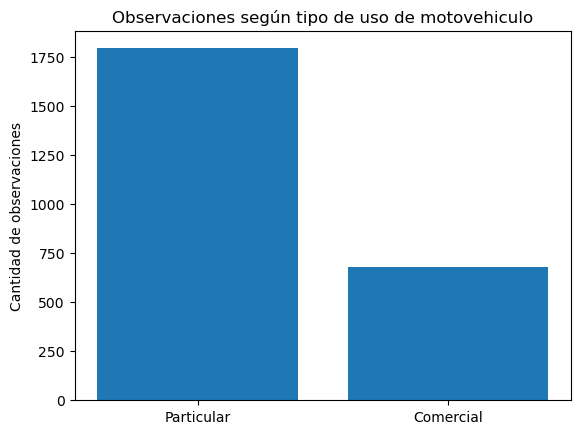

In [137]:
categorias = ['Particular', 'Comercial']
valores = df['Uso'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)
plt.title('Observaciones según tipo de uso de motovehiculo')

La mayor proporción de motovehiculos registrados es de uso particular.

### Sexo

Text(0.5, 1.0, 'Observaciones según tipo de uso sexo')

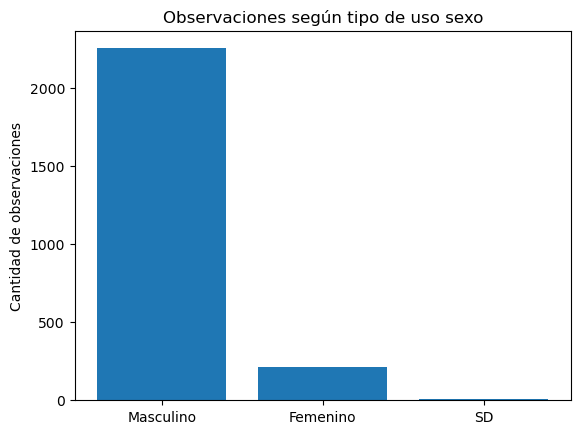

In [138]:
categorias = ['Masculino', 'Femenino', 'SD']
valores = df['Sexo'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)
plt.title('Observaciones según tipo de uso sexo')

In [139]:
to_drop = df[df['Sexo'] == 9].index
df.drop(to_drop, inplace = True)

La mayor cantidad de observaciones es de sexo masculino. Los registros sin datos se eliminan del dataset.

### Uso de casco por todos los ocupantes

Text(0.5, 1.0, 'Observaciones según uso de casco por todos los pasajeros')

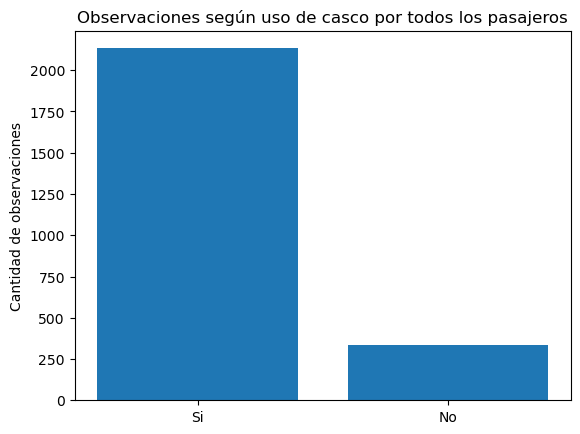

In [140]:
categorias = ['Si', 'No']
valores = df['Uso_Casco'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)
plt.title('Observaciones según uso de casco por todos los pasajeros')

En la mayoria de las observaciones los pasajeros usan casco en su totalidad.

### Tipo de distracción en cada observación

([<matplotlib.axis.XTick at 0x1cc70619050>,
 [Text(0.0, 0, 'Celular'),
  Text(1.0, 0, 'Fuma'),
  Text(2.0, 0, 'Come'),
  Text(3.0, 0, 'Ninguno')])

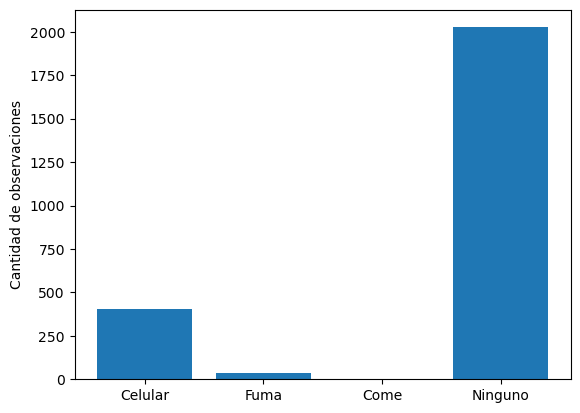

In [141]:
categorias = ['Celular', 'Fuma', 'Come', 'Ninguno']
valores = df['Tipo_Distraccion'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)

En la mayor parte de las observaciones no seregistraron distracciones. La distracción más resgistrada fue el uso de celular.

### Presencia de patente

([<matplotlib.axis.XTick at 0x1cc717874d0>,
 [Text(0.0, 0, 'Si'), Text(1.0, 0, 'No'), Text(2.0, 0, 'Sin dato')])

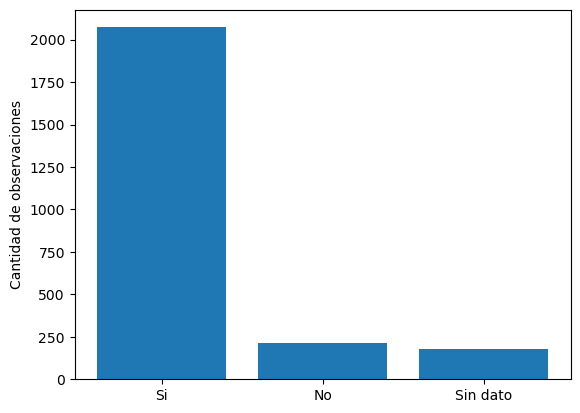

In [142]:
categorias = ['Si', 'No', 'Sin dato']
valores = df['Tiene_Patente'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')

plt.xticks(categorias)

In [143]:
to_drop = df[df['Tiene_Patente'] == 9].index
df.drop(to_drop, inplace = True)

La mayor parte de los motovehiculos poseen patente. Los registros sin datos se eliminan del dataset.

### Cantidad de ocupantes

Text(0.5, 1.0, 'Observaciones por cantidad de ocupantes')

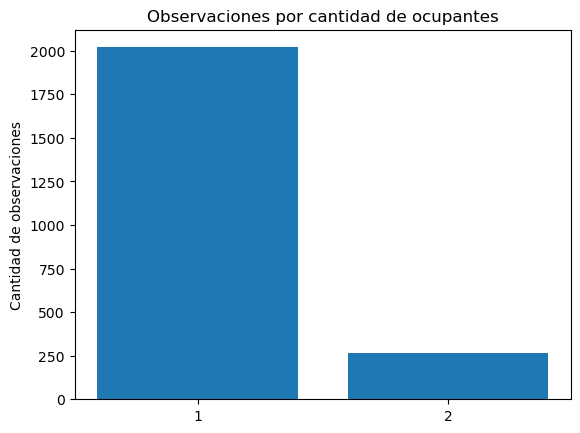

In [144]:
valores = df['Cantidad_Ocupantes'].value_counts().sort_index().values
categorias = df['Cantidad_Ocupantes'].value_counts().sort_index().index

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')
plt.xticks(categorias)
plt.title('Observaciones por cantidad de ocupantes')

La cantidad de ocupantes del motovehiculo es en su mayoria de una sola persona.

### Uso de casco por conductor

([<matplotlib.axis.XTick at 0x1cc706a90d0>,
 [Text(0.0, 0, 'Si'), Text(1.0, 0, 'No'), Text(2.0, 0, 'Sin dato')])

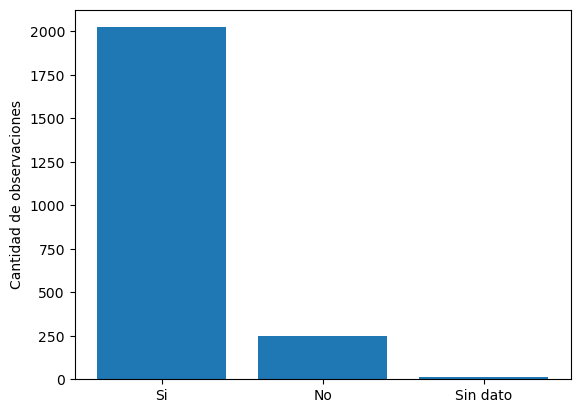

In [145]:
categorias = ['Si', 'No', 'Sin dato']
valores = df['Casco_Conductor'].value_counts().sort_index().values

plt.bar(categorias , valores)
plt.ylabel('Cantidad de observaciones')

plt.xticks(categorias)

El conductor en su mayoria usa casco.

In [146]:
to_drop = df[df['Casco_Conductor'] == 9].index
df.drop(to_drop, inplace = True)

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Modelado</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">Para la generación de perfiles se utiliza un modelo de aprendizaje automatico no supervisado. El modelo seleccionado es KModes que se basa en la moda estadística para generar para agrupar datos categoricos.<br> Para seleccionar la cantidad correcta de clusters del agrupamiento, se uso la metodología de curva elbow e índice silhouette.
    
</div>

### Curva elbow

La curva elbow se basa en el cálculo de las distancias cuadradas intracluster. Una distancia menor habla de un cluster más compacto y cohesivo. 
A medida que se aumentan los clusters de un modelo, la distancia disminuye porque cada cluster tengo menos puntos con una distancia hasta el centroide.
EL valor idoneo es donde se generaun "quiebre" en la curva.

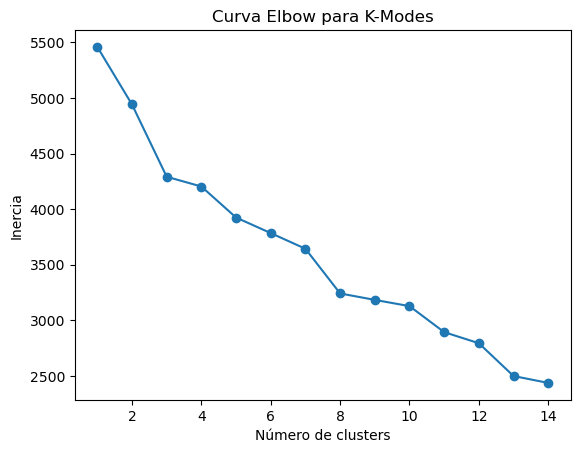

In [147]:
inertia = [] #Es la distancia intracluster

# Prueba diferentes valores de k (número de clusters)
for k in range(1, 15):
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    km.fit(df)
    # Calcula la inercia y la agrega a la lista
    inertia.append(km.cost_)

# Grafica la curva elbow
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Curva Elbow para K-Modes')
plt.show()


Si bien no es del todo claro, un modelo de 2 clusters representaria mejor la distribución de datos.

### Indice Silhouette

Proporciona una medida de cuán bien están separados los clusters y qué tan similares son los puntos dentro de un mismo cluster en comparación con los puntos en los clusters vecinos. Un indice alto significa que los cluster son densos y estan bien separados.

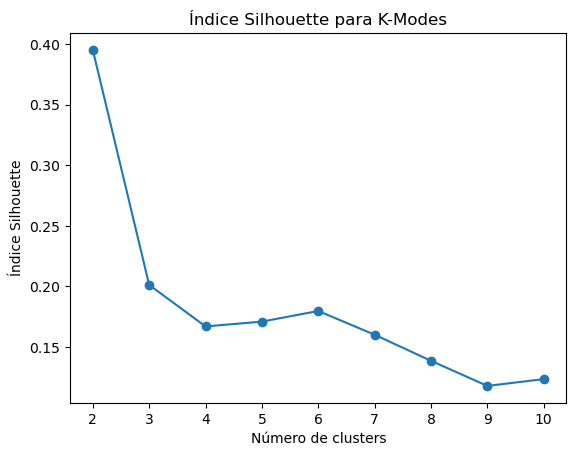

In [148]:
# Lista para almacenar los valores de índice Silhouette
silhouette_scores = []

# Prueba diferentes valores de k (número de clusters)
for k in range(2, 11):
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    clusters = km.fit_predict(df)
    silhouette_avg = silhouette_score(df, clusters, metric='hamming')
    silhouette_scores.append(silhouette_avg)

# Grafica la curva de índice Silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice Silhouette')
plt.title('Índice Silhouette para K-Modes')
plt.show()


El indice más grande se obtiene con dos clusters. También hay picos en 7 y 9 clusters con un indice un tanto menor. Cabe aclarar, que el indice obtenido no es muy bueno.

### Modelado con Kmodes

Se generan dos perfiles usando KModes. 
Como método de inicialización de cluster, utilizó Cao que daba los mejores resultados. En este método, los centroides iniciales se seleccionan de manera inteligente utilizando una técnica basada en la densidad de los datos.

In [149]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=2, init='Cao', n_init=50)

# Ajusta el modelo a los datos
clusters = km.fit_predict(df)

centroides = km.cluster_centroids_
centroides = pd.DataFrame(centroides, columns=df.columns)
centroides

,Dia_Habil,Turno,Zona,Uso,Sexo,Casco_Conductor,Tipo_Distraccion,Tiene_Patente,Cantidad_Ocupantes,Uso_Casco
0,1,2,3,1,1,1,4,1,1,1
1,1,1,2,2,1,2,1,1,1,2


<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Perfiles generados</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">A partir de el algoritmo de aprendizaje no supervisado KModes, se generaron dos perfiles basados en las observaciones registradas.</p>
</div>



### Perfil 1 - Perfil seguro

El perfil 1 circula en día laboral, durante la tarde en zona oeste. El motovehiculo es de uso particular, el sexo del conductor es masculino y usa casco. Este perfil no tiene distracciones aparentes, tiene patente y viaja solo. En caso de tener acompañante usa casco.


### Perfil 2 - Perfil de riesgo

El perfil 2 circula en día laboral, durante la mañana en zona norte. El motovehiculo es de uso comercial, el sexo del conductor es masculino y no usa casco. Este perfil tiene como distracción el uso de celular, tiene patente y viaja solo. En caso de tener acompañante no usa casco.

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: justify; color: #3A405A;">📊 Conclusiones</h1>

<br>

<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">A partir de un dataset de observaciones de factores de riesgo en motovehiculos en Ciudad de Buenos Aires, se generó un modelo de aprendizaje no supervisado y se determinaron dos perfiles de conductores de motovehiculos.
    Analizando las caracteristicas de ambos perfiles, se designaron un perfil de riesgo y uno seguro. <br>
    A partir de estos perfiles generados, se sugiere realizar una clasificación de la población y generar una concientización y educación vial pertinente para reducir los factores de riesgo y la potencialidad de accidentes.</p>
</div>

